# Obdelava 69. vaje

## ABSORPCIJA SEVANJA GAMA

Gregor Žunič, 15.4.2020

## Uvod

Radioaktivni razpad povzroča gamma sevanja (sevanja valovne dolžine 1 nm do $10^{-3}$ nm). Če curek vzporedno potujočih delcev usmerimo skozi zaslon skozi debelino $d$ se tok delcev zmanjša, ta je eksponentno odvisen od debeline zaslona z enačbo
$$ \Phi = \Phi_0 e^{-\mu d} $$
$\Phi_0$ je prvotni pretok, $\Phi$ pa trenutni. $\mu$ je koeficient absorpcije.
Gamma sevanje merimo z Geiger-Mullerjevem števcem. Sestavlja ga kovinska cev, ki deluje kot zunanja elektroda, na isti osi pa pritrjena tanka žička kot druga elektroda. Cev je najpoljenja s plini pri tlaku 100mb.
Števec je priključen na tok enosmerne napetosti, žička v sredini je pozitivna. Gama delec pri preletu skozi cev ustvari ione in elektroni, ki v cevi sprožijo kratkotrajen električni tok. Ta sunek zaznamo z števcem (ki potem lahko recimo odda zvok), sunek pa sproži vsak stoti foton.
Ker je radiokativni razpad slučajni pojav, nemoremo v istem času izmeriti enako število sunkov. Po Poisonovi porazdelitvi 
$$ W_N = \frac{\overline{N}^N}{N!}e^{-\overline{N}} $$
se izkaže, da je efektivni odmik porazdelitve od $\overline{N}$, $\sigma = \sqrt{\overline{N}}$
V času $dt$ razpade $\frac{dN}{N} = -\lambda dt$, in po integraciji dobimo, $T_{1/2} = \frac{ln2}{\lambda}$, $\lambda$ je verjetnost razpda.

## Naloga

1. Preizkusi enačbo $\sigma = \sqrt{\overline{N}}$ z večkratnim štetjem razpadov v enakih časovnih intervalih.
2. Izmeri razpolovno debelino svinca za sevanje gama, ki jih pri radioaktivnem razpadu seva kobaltov izvor!
3. Določi porazdelitev časovnih intervalov med zaporednimi razpadi.

### Obdelava in rezultati

In [1]:
import csv
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame
from negotovost import Negotovost

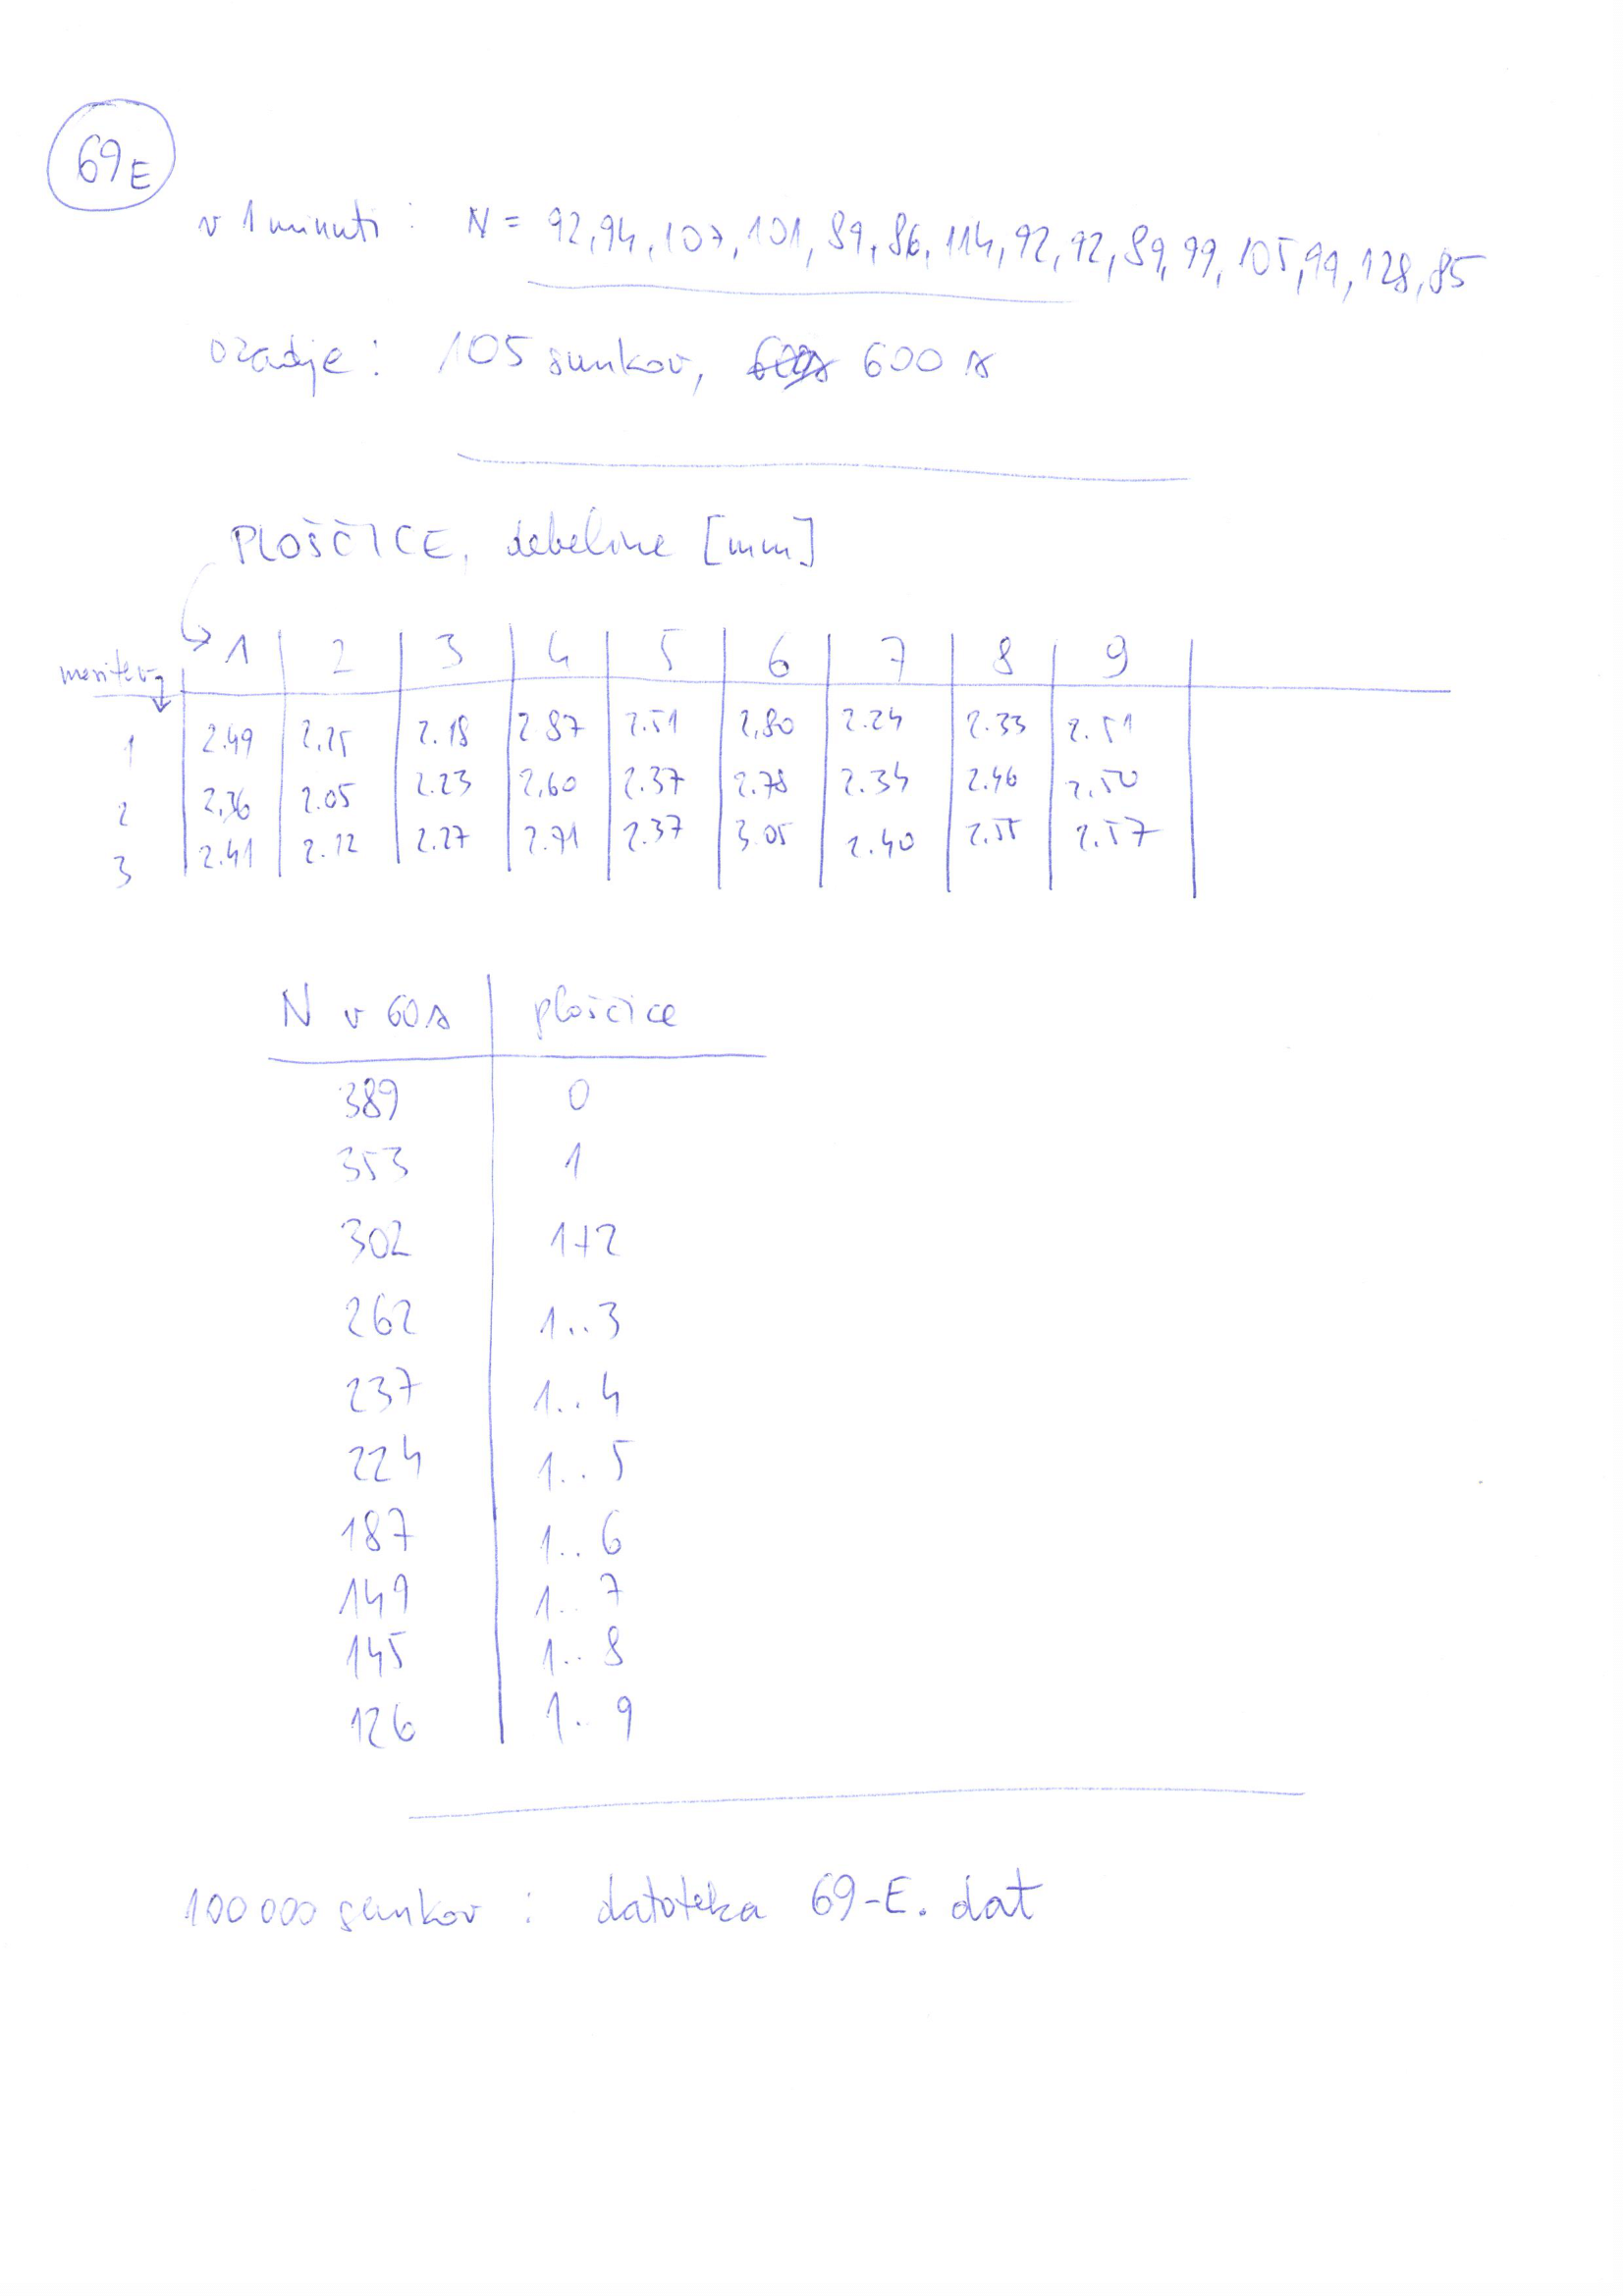

In [2]:
#podatki, ki sem jih dobil
Image(filename='69-E-1.png',width=400)

#### 1. del

In [3]:
data = pd.read_csv('sunki_minuta.csv')
display(data)
data = data.loc[:,'meritve']
ozadje = 105/10
ozadje_err = (ozadje)**(1/2)
ozadje_err

,meritve
0,92
1,94
2,107
3,101
4,89
5,86
6,114
7,92
8,92
9,89


3.24037034920393

In [4]:
sem = np.std(data)
poisson = np.mean(data)**(1/2)
print(sem, poisson)
napaka = (sem)/(poisson)-1
print(napaka)

11.241984799056715 9.906226997870245
0.13484021731721318


Poissonov efektivni odmik se od standarne deviacije ($\sigma$) razlikuje za 10%, kar je zelo blizu dejanse vrednosti.

#### 2. del

In [5]:
df_ploscice = pd.read_csv('ploscice.csv')
display(df_ploscice)

,1,2,3,4,5,6,7,8,9
0,2.49,2.25,2.18,2.87,2.51,2.80,2.24,2.33,2.51
1,2.36,2.05,2.23,2.60,2.37,2.78,2.34,2.46,2.50
2,2.41,2.12,2.27,2.71,2.37,3.05,2.40,2.55,2.57


In [6]:
ploscice = []
ploscice_errs = []
for index in df_ploscice:
    col = df_ploscice[index]
    ploscice_errs.append(stats.sem(col))
    ploscice.append(np.mean(col))
print(ploscice,ploscice_errs)

[2.42, 2.14, 2.2266666666666666, 2.7266666666666666, 2.4166666666666665, 2.8766666666666665, 2.3266666666666667, 2.4466666666666668, 2.526666666666667] [0.03785938897200192, 0.058594652770823194, 0.026034165586355473, 0.07838650677536566, 0.046666666666666565, 0.08685876147196923, 0.04666666666666657, 0.06385748020222666, 0.021858128414339976]


Izračunal sem debelino vsake ploščice, ki je povprečje, vsaka pa ima napako, ki je standardna napaka (standard mean error).

In [7]:
N60 = pd.read_csv('N60.csv')
display(N60)

,N
0,389
1,353
2,302
3,262
4,237
5,224
6,187
7,147
8,145
9,126


In [8]:
phi = [x-ozadje for x in N60['N']]
phi_norm = [-np.log(x/phi[0]) for x in phi]
aktiv_plosce = [sum(ploscice[0:x]) for x in range(len(ploscice)+1)]
aktiv_plosce_err = [sum(ploscice_errs[0:x]) for x in range(len(ploscice_errs)+1)]
print(phi_norm,aktiv_plosce)
y = phi_norm
x = aktiv_plosce

[-0.0, 0.09994441517522348, 0.26117606708695645, 0.4087730833377095, 0.5134711279544149, 0.5725792402088243, 0.762895196504152, 1.019891458252489, 1.0346518738356096, 1.1869455429156552] [0, 2.42, 4.5600000000000005, 6.786666666666667, 9.513333333333334, 11.93, 14.806666666666667, 17.133333333333333, 19.58, 22.106666666666666]


Vsaki meritvi $\phi$ sem najprej odštel zunanji šum, normaliziral (s prvo vrednostjo $\phi_0$) in nato celotno stvar logaritmiral z naravnim logaritmom.
Aktivne ploščice sem med sabo samo seštel (0,1,1+2,...)
Če enačbo
$$ \Phi = \Phi_0 e^{-\mu d} $$
na obeh straneh logaritmiramo dobimo enačbo
$$ - \ln{\frac{\Phi}{\Phi_0}} = \mu * d $$
kjer je $\mu$ absorbcijski koeficient z enoto $[mm^{-1}]$.

In [9]:
def fit_func(x, a, b):
    return x*a+b

In [10]:
params = curve_fit(
    fit_func, x, y)
mu = params[0][0]
b = params[0][1]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print('mu =', mu,'1/mm','+-',errs[0],'1/mm', '\nb =', b,'+-',errs[1])

mu = 0.05418213895464538 1/mm +- 0.0021619168045184014 1/mm 
b = -0.0036675454951303295 +- 0.028108299584873188


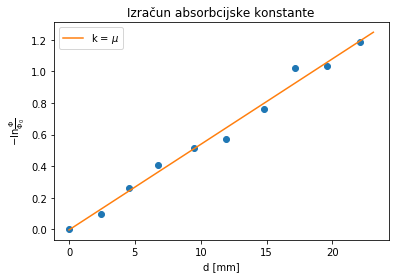

In [11]:
x_fit = np.linspace(0, max(x)+1, 100)

y_fit = fit_func(x_fit, mu, b)

plt.plot(x, y, 'o')
plt.plot(x_fit, y_fit, label=r'k = $\mu$')

plt.title(r'Izračun absorbcijske konstante')
plt.ylabel(r'$-\ln{\frac{\Phi}{\Phi_0}}$')
plt.xlabel(r'd [mm]')

plt.legend()
plt.show()

Absorbcijski koeficient $\mu$ je iz grafa očitno
$$ \mu = ( 0.054 \pm 0.002 ) \frac{1}{mm}$$


Začetno enačbo na obeh straneh logaritmiramo in vstavimo $\Phi = \Phi_0/2 $.
Tako je razpolovna dolžina svinca izračunana po enačbi
$$ \frac{\ln2}{\mu} = d_{1/2} $$


In [12]:
d12 = np.log(2) / mu
errd12 = errs[0]/mu*d12
print(d12,errd12)

12.79290913819705 0.5104487526359273


Ko izračunamo je $d_{1/2} = (12.8 \pm 0.5) \: mm $ .

4.986E-02 +- 1.286E-03


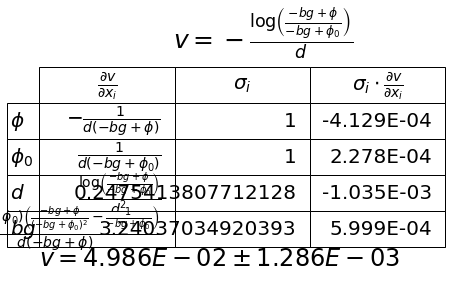

(0.04254048316216627, 0.00184624200228775)
(0.059150936148066914, 0.00169912862182145)
(0.062370236445718465, 0.00150624032227392)
(0.05600608239153112, 0.00146325973942110)
(0.04986395298634901, 0.00128560999309413)
(0.05376599390898612, 0.00148234623260550)
(0.06255648042125213, 0.00177478309840191)
(0.055556760600811744, 0.00160178998208188)
(0.056730515139237374, 0.00162202009125170)


In [27]:
info = [
        ('phi', phi[5], 1),
        ('phi_0', phi[0], 1),
        ('d', aktiv_plosce[5], aktiv_plosce_err[5]),
        ('bg', ozadje, ozadje_err)
    ]

func = '-ln((phi-bg)/(phi_0-bg))/d'
Negotovost(info,func, floating_points=3).draw_table(variable='v', text_size=20)

for i in range(1,len(aktiv_plosce)):
    info = [
        ('phi', phi[i], 1),
        ('phi_0', phi[0], 1),
        ('d', aktiv_plosce[i], aktiv_plosce_err[i]),
        ('bg', ozadje, ozadje_err)
    ]
    
    print(Negotovost(infol,func, floating_points=3).calculate_error())

S tabelo negotovosti lahko preverimo, da je napaka zares $\pm 0.002 mm$.

#### 3. del

In [14]:
casov_100k = pd.read_csv('69-E.dat',header=None)

dt = [casov_100k[0][x]-casov_100k[0][x-1] for x in range(1,len(casov_100k[0]))]

mean: 0.46908763380821855 ; stdev: 0.4183012654244323


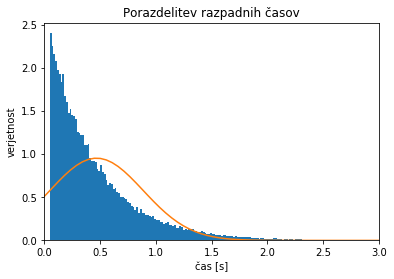

In [15]:
bins = int((len(dt))**0.5)

res = stats.cumfreq(dt, numbins=bins)

x = res.lowerlimit + \
    np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)

mean, std = stats.norm.fit(dt)

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)

ax1.hist(dt, bins=bins, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, mean, std)
ax1.plot(x, y)
ax1.set_xlabel('čas [s]')
ax1.set_ylabel('verjetnost')
ax1.set_title('Porazdelitev razpadnih časov')
ax1.set_xlim([0,3])

t = mean

print("mean:",mean,'; stdev:', std)

Na histogrmau je prikazanih N = 87 tisoč sunkov, ki so razdeljeni v koren N binov.
Gaussova krivulja se ne more prilegati, ker levo od nič ni nobene meritve (čas nemore biti negativen).
Povprečna vrednost je pri $\overline{t} = 0,469 s $; standardna deviacija $\sigma = 0.418 s$.